In [1]:
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF
from scipy.sparse import lil_matrix 
import numpy as np

C:\Users\toni.mattis\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
m = lil_matrix((10,5)) # 10 projects, 5 dependencies

# cluster in the top left
m[0,0]=1
m[0,1]=1
m[1,0]=1
m[1,1]=1

# cluster in the center left
m[5,0]=1
m[6,1]=1

# cluster in the center right
m[2, 2] = 1
m[2, 3] = 1
m[2, 4] = 1
m[3, 2] = 1
m[3, 4] = 1
m[4, 2] = 1
m[4, 3] = 1

# cluster in the bottom right
m[7, 3] = 1
m[7, 4] = 1
m[8, 2] = 1
m[8, 4] = 1
m[9, 3] = 1
m[9, 2] = 1
m[9, 1] = 1

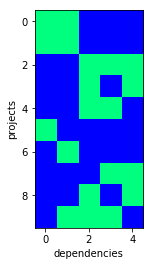

In [3]:
# heatmap, darker = no link, brigher = link
plt.xlabel('dependencies')
plt.ylabel('projects')
plt.imshow(m.toarray(), cmap='winter')


In [4]:
factorization = NMF(n_components=2, alpha=0.01, max_iter=100)

In [5]:
model = factorization.fit(m) # the two "clusters" and how likely each dependency belongs to them
encoded = model.transform(m) # how likely each package belongs to the clusters

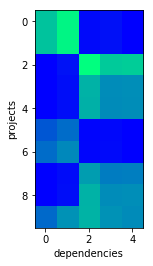

In [6]:
# the "interpolated" matrix
plt.xlabel('dependencies')
plt.ylabel('projects')
plt.imshow(model.inverse_transform(encoded), cmap='winter' )

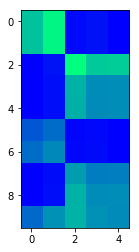

In [7]:
# matrix multiplication yields same result as inverse transform (as it should!)
plt.imshow(encoded.dot(model.components_), cmap='winter' )

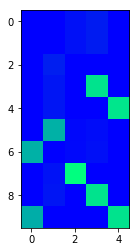

In [8]:
# recommendations should be packages that are not observed, but belong to the respective clusters/components according to NMF:
predicted = encoded.dot(model.components_)
recommendation = np.where(m.toarray() == 0, predicted, 0.0)
plt.imshow(recommendation, cmap='winter')

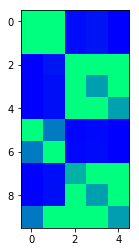

In [9]:
# comparing with the original observation, these are the "gaps" in the data:
plt.imshow(m.toarray() + recommendation, cmap='winter')

In [10]:
# we can also recommend packages for any new combination of dependencies:

deps = [1, 0, 0, 1, 1]
model.inverse_transform(model.transform([deps])) - deps

array([[-0.63630906,  0.50611746,  0.68289205, -0.44375959, -0.46683654]])